In [20]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("zara.csv", delimiter=";") 
print (df.head())

  Product Position Promotion Product Category Seasonal  Sales Volume  \
0           Behind       Yes         Clothing      Yes          2968   
1            Aisle        No         Clothing       No          2823   
2            Aisle        No         Clothing       No           654   
3          End-cap       Yes         Clothing      Yes          2220   
4            Aisle       Yes         Clothing      Yes          1568   

                    name   price    terms section  
0  100% WOOL SUIT JACKET  159.00  jackets     MAN  
1    BASIC PUFFER JACKET   19.99  jackets     MAN  
2          TUXEDO JACKET  169.00  jackets     MAN  
3   SLIM FIT SUIT JACKET  129.00  jackets     MAN  
4    STRETCH SUIT JACKET  129.00  jackets     MAN  


Este conjunto de datos de ventas de Zara contiene información sobre las ventas de productos de las tiendas Zara durante un período de tiempo específico. El conjunto de datos incluye varios atributos relevantes para las ventas, nombre del producto, categoría del producto, precio y volumen de ventas. Estos datos se pueden utilizar para analizar las tendencias de ventas de productos, el desempeño de las ventas en diferentes categorías de productos, la efectividad de las promociones, los patrones de compra de los clientes y otros factores que influyen en el desempeño de las ventas de Zara. El análisis de este conjunto de datos puede proporcionar información valiosa para la dirección de Zara a la hora de optimizar las estrategias de marketing, la gestión de inventario y otros procesos de toma de decisiones para mejorar los ingresos y la rentabilidad.

Posición del producto: la posición del producto en el catálogo o diseño de la tienda.
Promoción: Indicador de si el producto se encuentra actualmente en promoción o no.
Categoría de producto: La categoría del producto, como ropa, accesorios, zapatos, etc.
Estacional: Indicador de si el producto forma parte de una colección de temporada específica.
Volumen de Ventas: La cantidad de productos vendidos.
Nombre: Nombre del producto.
Precio: Precio del producto.
Sección: Sección o categoría donde se vende el producto en la tienda (p. ej., ropa de mujer, ropa de hombre, ropa de niño, etc.).

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  253 non-null    object 
 1   Promotion         253 non-null    object 
 2   Product Category  253 non-null    object 
 3   Seasonal          253 non-null    object 
 4   Sales Volume      253 non-null    int64  
 5   name              252 non-null    object 
 6   price             253 non-null    float64
 7   terms             253 non-null    object 
 8   section           253 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.9+ KB


In [22]:
df.shape

(253, 9)

                                 Visualización de las variables
                                           categóricas

In [23]:
print(df.columns)

Index(['Product Position', 'Promotion', 'Product Category', 'Seasonal',
       'Sales Volume', 'name', 'price', 'terms', 'section'],
      dtype='object')


<Axes: xlabel='Product Position', ylabel='count'>

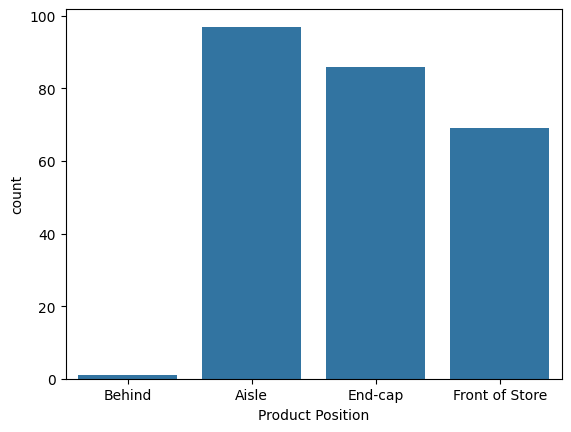

In [24]:
sns.countplot(x='Product Position',data=df)


En la anterior gráfica encontramos como se distribuyen las ventas de productos en Zara según su ubicación dentro de la tienda, teniendo en cuenta que:
- **Aisle:** Son los productos que se encuentran en el pasillo.
- **End-cap:** Son los productos en el extremo del pasillo.
- **Front of Store:** Los productos ubicados en el frente de la tienda.

A partir de esta información, podemos analizar en la gráfica que Aisle es la ubicación con las ventas más altas siendo los productos más populares entre los compradores. Esto podría deberse a la mayor visibilidad y accesibilidad de estos productos. Por otra parte, aunque las ventas de los productos End-cap son más bajas que en el pasillo, los productos en el extremo del pasillo aún tienen un buen rendimiento, estos lugares suelen ser estratégicos para destacar productos específicos o promociones. Finalmente, los productos Front of Store tienen las ventas más bajas, esto se puede dar a causa de que los compradores a menudo se dirigen directamente al pasillo o al área de interés específico en lugar de explorar el frente de la tienda.

<Axes: xlabel='Promotion', ylabel='count'>

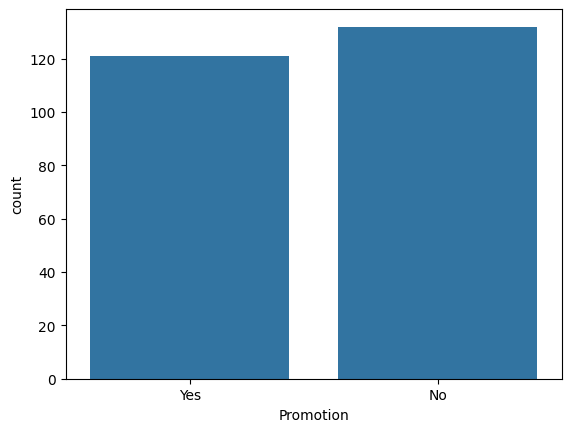

In [25]:

sns.countplot(x="Promotion",data=df)

La anterior gráfica nos muestra que la mayoría de los productos vendidos no se encontraban en promoción especifamente el 52%, sin embargo, los productos que si lo estaban no se alejan de una diferencia mínima representando el 48%. 

<Axes: xlabel='Seasonal', ylabel='count'>

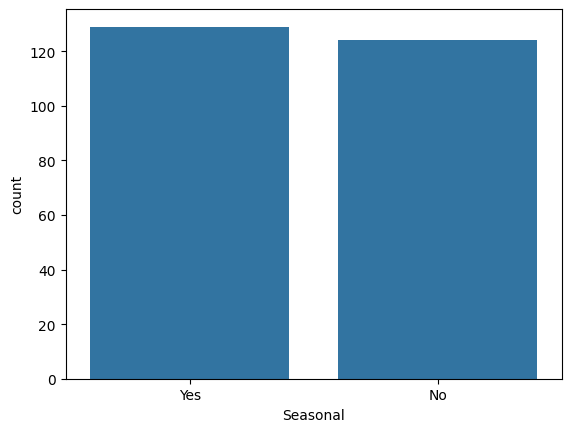

In [26]:

sns.countplot(x="Seasonal",data=df)

En la anterior gráfica podemos analizar que el 51% de las ventas se realizaron con ropa de temporada, mientras que el 49% no, esto se podría explicar gracias a que algunos países en los que se encuentra Zara, no son estacionales, así mismo, se puede explicar gracias a que los precios de las prendas que no son de temporada tienden a ser más bajos y a estar en promociones u ofertas especiales. 

<Axes: xlabel='terms', ylabel='count'>

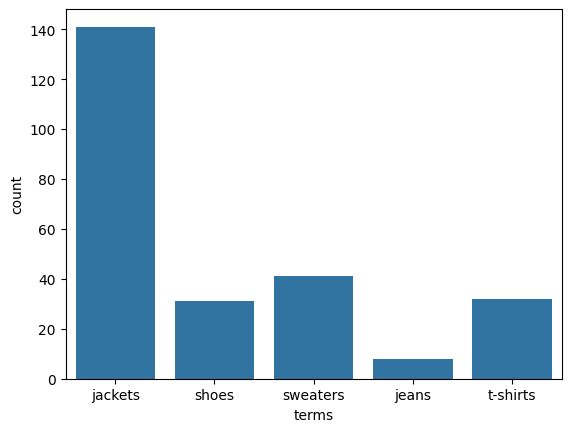

In [27]:
sns.countplot(x="terms",data=df)



 En la anterior gráfica podemos observar la clasificación de las prendas de ropa acorde a las ventas registradas. Las chaquetas fue el producto que representó la mayoría de las ventas (56%), seguido de los suéteres (16%), finalmente las camisetas con el (13%), los zapatos con el (12%) y los jeans con el (3%). Esto implica que las chaquetas se presentan como el producto preferido dentro del portafolio de Zara en ese periodo de tiempo, se pueden asociar factores como el clima o el precio de estos productos en esa temporada.

<Axes: xlabel='section', ylabel='count'>

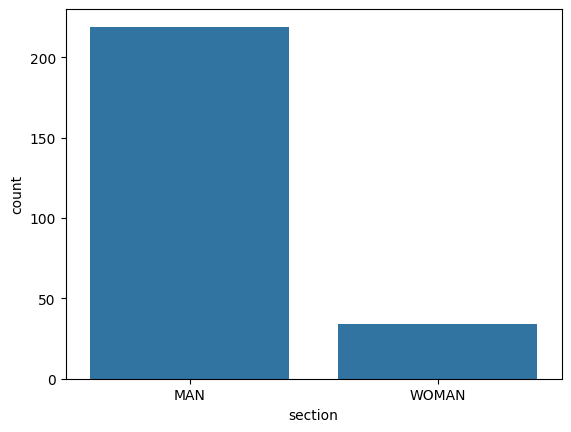

In [28]:
sns.countplot(x="section",data=df)

Se puede evidenciar que la mayor cantidad de ventas se efectuó en la sección de ropa para hombres.

                                 Visualización de las variables 
                                numéricas y tratamiento de outliers                   

<Axes: ylabel='Sales Volume'>

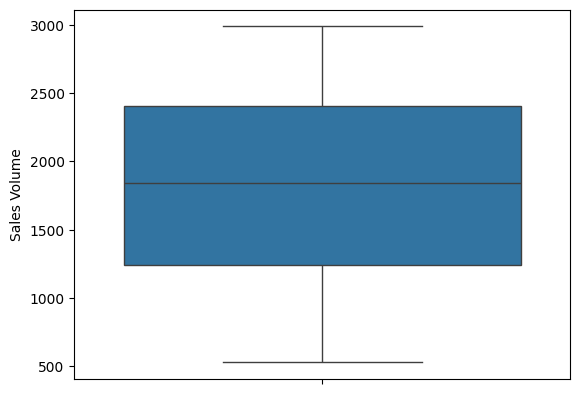

In [29]:
sns.boxplot(y="Sales Volume",data=df)

                                 Correlaciones                  

Esta gráfica muestra una distribución del volumen de ventas, con la mayoría de las observaciones concentradas en el rango entre 1500 y 2500 y una mediana cerca de 2000.

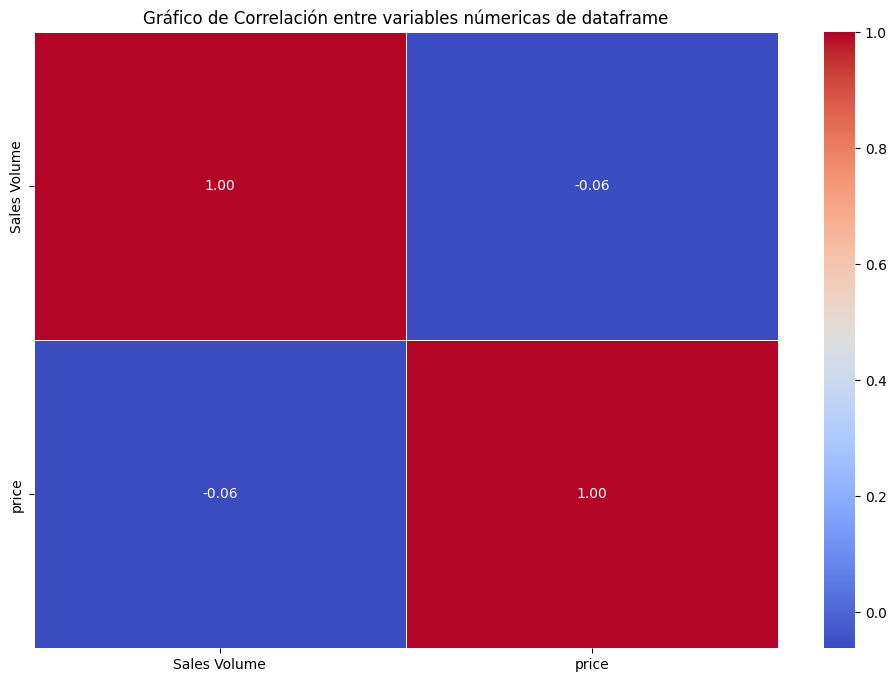

In [30]:
variables_numericas= ["Sales Volume","price",]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Para la variable dependiente precio podemos ver que las variables independientes que mayor correlacion positiva tiene es Volumen de Ventas.

                            Creación de variables Dummies

En este paso se realiza la conversión de las variables categóricas a numéricas. Es decir, se vuelven 0 y 1 para poder evitar posibles errores

In [31]:
df= pd.get_dummies(df)

df = df.astype(int)

In [32]:
df.head()

,Sales Volume,price,Product Position_Aisle,Product Position_Behind,Product Position_End-cap,Product Position_Front of Store,Promotion_No,Promotion_Yes,Product Category_Clothing,Seasonal_No,...,name_ZIPPER MULTIPIECE SNEAKERS,name_ZIPPERED JACKET,name_ZIPPERED WOOL BLEND OVERSHIRT,terms_jackets,terms_jeans,terms_shoes,terms_sweaters,terms_t-shirts,section_MAN,section_WOMAN
0,2968,159,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2823,19,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2,654,169,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,2220,129,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1568,129,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 212 entries, Sales Volume to section_WOMAN
dtypes: int32(212)
memory usage: 209.6 KB


In [34]:
df.head()

,Sales Volume,price,Product Position_Aisle,Product Position_Behind,Product Position_End-cap,Product Position_Front of Store,Promotion_No,Promotion_Yes,Product Category_Clothing,Seasonal_No,...,name_ZIPPER MULTIPIECE SNEAKERS,name_ZIPPERED JACKET,name_ZIPPERED WOOL BLEND OVERSHIRT,terms_jackets,terms_jeans,terms_shoes,terms_sweaters,terms_t-shirts,section_MAN,section_WOMAN
0,2968,159,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2823,19,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2,654,169,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,2220,129,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1568,129,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 212 entries, Sales Volume to section_WOMAN
dtypes: int32(212)
memory usage: 209.6 KB


                             Regresión Lineal Multiple
                                  método rápido
                                

In [36]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

X_multi=df.drop(columns=["Sales Volume"],axis=1)
X_multi.head()
y_multi = df["Sales Volume"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales Volume   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1.163
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.270
Time:                        13:10:13   Log-Likelihood:                -1793.2
No. Observations:                 253   AIC:                             3994.
Df Residuals:                      49   BIC:                             4715.
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
price                                                 -4.2539      2.370     -1.795      0.079      -9.017       0.510
Product Position_Aisle                               -56.9517    234.489     -0.243      0.809    -528.174     414.271
Product Position_Behind                              952.5090    724.157      1.315      0.195    -502.739    2407.757
Product Position_End-cap                             -39.2340    255.295     -0.154      0.878    -552.269     473.801
Product Position_Front of Store                     -138.9574    258.552     -0.537      0.593    -658.537     380.622
Promotion_No                                         458.2418    131.656      3.481      0.001     193.669     722.815
Promotion_Yes                                        259.1241    125.747      2.061      0.045       6.426     511.822
Product Category_Clothing                            717.3659    169.504      4.232      0.000     376.734    1057.998
Seasonal_No                                          430.1803    116.692      3.686      0.001     195.678     664.682
Seasonal_Yes                                         287.1857    123.944      2.317      0.025      38.110     536.261
name_100% FEATHER FILL PUFFER JACKET                -455.2616    841.187     -0.541      0.591   -2145.690    1235.167
name_100% LINEN OVERSHIRT                            465.8432    935.678      0.498      0.621   -1414.472    2346.158
name_100% WOOL SUIT JACKET                           408.8692    975.877      0.419      0.677   -1552.228    2369.967
name_ABSTRACT JACQUARD SWEATER                     -1150.7560   1217.273     -0.945      0.349   -3596.958    1295.446
name_ABSTRACT PRINT KNIT T-SHIRT                      -2.3017    975.765     -0.002      0.998   -1963.174    1958.571
name_ABSTRACT PRINT T-SHIRT                        -1081.5839    997.522     -1.084      0.284   -3086.179     923.011
name_ACID WASH DENIM JACKET                          -47.5566    987.118     -0.048      0.962   -2031.245    1936.132
name_ADHERENT STRIPES SNEAKERS                       877.5454   1349.579      0.650      0.519   -1834.536    3589.627
name_ALPACA AND WOOL BLEND TIE DYE KNIT SWEATER     -929.2421    671.896     -1.383      0.173   -2279.468     420.983
name_ALPACA BLEND OPEN KNIT SWEATER                 -202.6191    681.905     -0.297      0.768   -1572.959    1167.721
name_ASYMMETRIC CROPPED KNIT SWEATER                1096.3365    668.988      1.639      0.108    -248.045    2440.718
name_ASYMMETRICAL WOOL AND SILK BLEND SWEATER       1195.4149    668.511      1.788      0.080    -148.009    2538.839
name_BAGGY BELTED JEANS                             -265.8485    626.104     -0.425      0.673   -1524.053  

#### Si bien la regresion nos dio un valor alto, lo cierto es que posee muchos errores de multicolinealidad, por esta razon se realiza una nueva regresion tomando solo variables que se consideran significativas y evitando los errores de multicolinealidad

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 212 entries, Sales Volume to section_WOMAN
dtypes: int32(212)
memory usage: 209.6 KB


In [38]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Supongamos que 'Variable1', 'Variable2' y 'Variable3' son las variables que deseas seleccionar

# Seleccionar las tres variables predictoras y la variable de respuesta
X_multi = df[['price', 'Product Position_Aisle', 'terms_jackets']]
y_multi = df['Sales Volume'].astype(float)

# Agregar una constante para el término independiente
X_multi_cons = sm.add_constant(X_multi)

# Ajustar el modelo de regresión lineal múltiple
lm_multi = sm.OLS(y_multi, X_multi_cons).fit()

# Mostrar un resumen del modelo
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales Volume   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9607
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.412
Time:                        13:10:13   Log-Likelihood:                -2014.5
No. Observations:                 253   AIC:                             4037.
Df Residuals:                     249   BIC:                             4051.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1867

Teniendo en cuenta que esta regresion de un valor inferior a la original, se considera que este modelo es mejor ya que se encuentra libre de errores 

### BASE DE DATOS
#### Xontoloyo. (s/f). Data Penjualan Zara. Kaggle. Recuperado de https://www.kaggle.com/datasets/xontoloyo/data-penjualan-zara